In [1]:
import pandas as pd
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")


In [2]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
data.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [5]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
data['holiday'] = data['holiday'].fillna('No Holiday')


In [7]:
data.isnull().sum()


holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

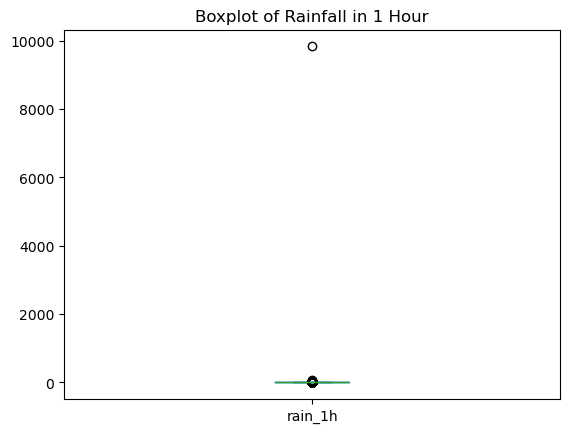

In [8]:
import matplotlib.pyplot as plt
data['rain_1h'].plot.box()
plt.title('Boxplot of Rainfall in 1 Hour')
plt.show()

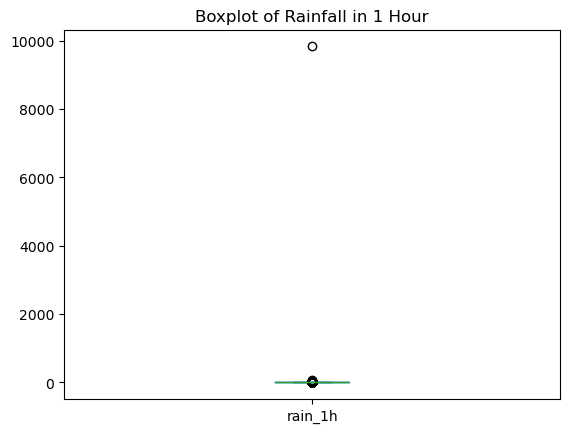

In [9]:
import matplotlib.pyplot as plt
data['rain_1h'].plot.box()
plt.title('Boxplot of Rainfall in 1 Hour')
plt.show()
# Cap extreme values
data['rain_1h'] = data['rain_1h'].clip(upper=50)


In [10]:
data['temp_celsius'] = data['temp'] - 273.15


In [11]:

data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')


Feature Engineering


In [13]:
# Extract hour, weekday, and weekend information from date_time
data['hour'] = data['date_time'].dt.hour
data['weekday'] = data['date_time'].dt.weekday
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [14]:
# Categorical Encoding for holiday and weather_main:
# Use one-hot encoding or label encoding for categorical columns
data = pd.get_dummies(data, columns=['holiday', 'weather_main'], drop_first=True)


In [15]:
# Aggregate Features:
# Create rolling averages for traffic_volume over time if analyzing trends.
data['traffic_rolling_mean'] = data['traffic_volume'].rolling(window=3).mean()



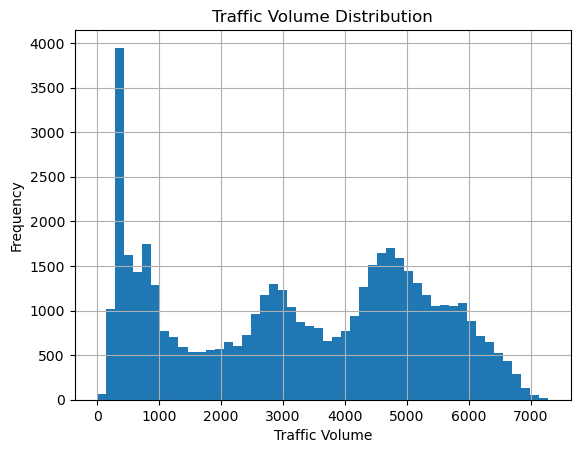

In [16]:
# Traffic Volume Distribution:
# Plot the distribution of traffic_volume.

data['traffic_volume'].hist(bins=50)
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

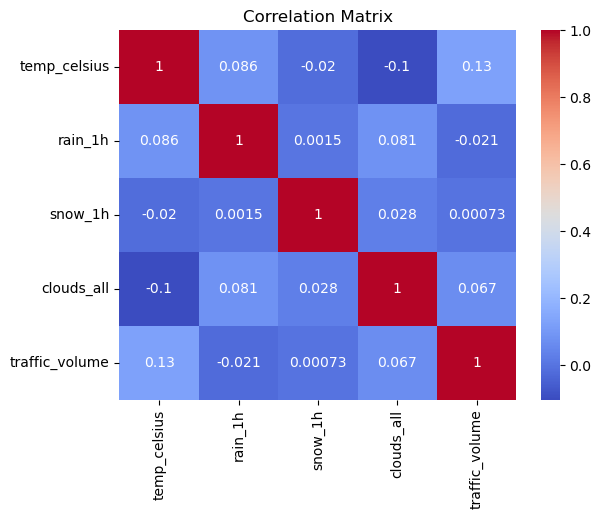

In [17]:
# Correlation Analysis:
# Check how numerical features correlate with traffic_volume.

import seaborn as sns
corr_matrix = data[['temp_celsius', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

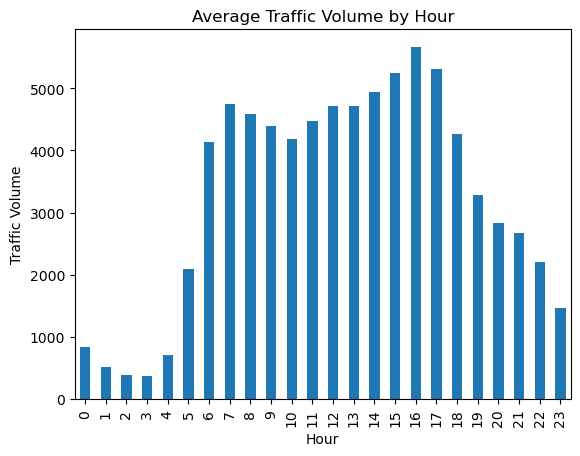

In [18]:
# Traffic Volume by Time:
# Analyze how traffic_volume changes by hour or day.

data.groupby('hour')['traffic_volume'].mean().plot(kind='bar')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.show()

In [19]:
# Prepare Data:
# Select relevant features (e.g., temp_celsius, rain_1h, clouds_all, hour, is_weekend) and define the target as traffic_volume.
X = data[['temp_celsius', 'rain_1h', 'clouds_all', 'hour', 'is_weekend']]
y = data['traffic_volume']


In [20]:
# Split into Training and Testing Sets:
# Use 80% of the data for training and 20% for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Train Models:
# Start with basic models like Linear Regression and Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [22]:
# Evaluate Models:
# Evaluate the models using metrics like MAE, MSE, and 𝑅2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Metrics
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))


Linear Regression MAE: 1579.5067049858296
Linear Regression R^2: 0.1849763227746496
Random Forest MAE: 311.81953905261236
Random Forest R^2: 0.9293893142580512


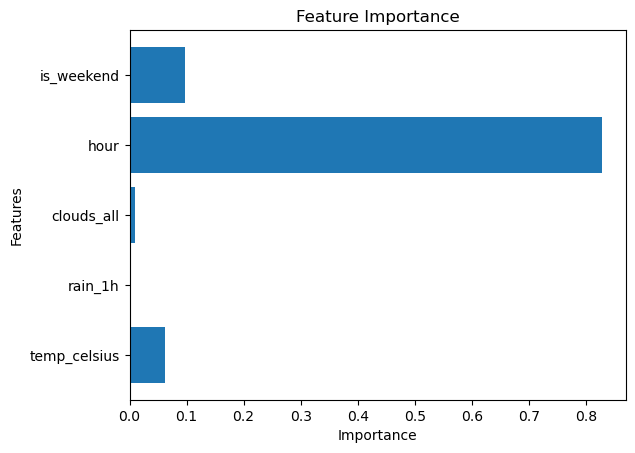

In [23]:
import matplotlib.pyplot as plt
feature_importances = rf_model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


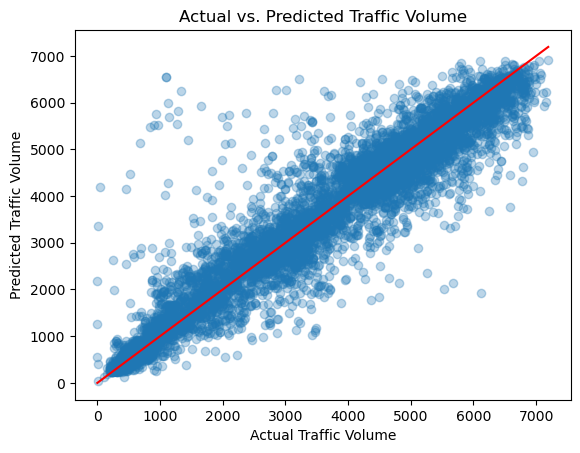

In [24]:
import numpy as np
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot(np.linspace(0, max(y_test), 100), np.linspace(0, max(y_test), 100), color='red')
plt.title("Actual vs. Predicted Traffic Volume")
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.show()


In [25]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_absolute_error')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# best_rf_model = grid_search.best_estimator_


In [26]:
# import joblib
# joblib.dump(rf_model, "traffic_volume_predictor.pkl")


In [27]:
# import pandas as pd
# import joblib

# # Load the saved Random Forest model
# model = joblib.load("traffic_volume_predictor.pkl")

# # Function to preprocess new input data
# def preprocess_input(data):
#     # Convert temperature from Kelvin to Celsius
#     data['temp_celsius'] = data['temp'] - 273.15
    
#     # Extract time-based features
#     data['hour'] = pd.to_datetime(data['date_time']).dt.hour
#     data['weekday'] = pd.to_datetime(data['date_time']).dt.weekday
#     data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)
    
#     # Drop unused columns and select relevant features
#     features = ['temp_celsius', 'rain_1h', 'clouds_all', 'hour', 'is_weekend']
#     return data[features]

# # Function to predict traffic volume
# def predict_traffic(new_data):
#     # Preprocess the input data
#     processed_data = preprocess_input(new_data)
    
#     # Make predictions
#     predictions = model.predict(processed_data)
#     return predictions

# # Example: New data for prediction
# new_data = pd.DataFrame({
#     "temp": [293.15, 285.15],  # Temperature in Kelvin
#     "rain_1h": [0.0, 5.0],    # Rainfall in last 1 hour
#     "clouds_all": [20, 80],   # Cloud coverage in percentage
#     "date_time": ["2023-11-21 10:00:00", "2023-11-21 18:00:00"]  # Date and time
# })

# # Predict traffic volume
# predictions = predict_traffic(new_data)

# # Display the results
# new_data['predicted_traffic_volume'] = predictions
# print(new_data)


In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_train.dtypes)


(38563, 5)
(38563,)
temp_celsius    float64
rain_1h         float64
clouds_all        int64
hour              int32
is_weekend        int64
dtype: object


In [57]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


temp_celsius    0
rain_1h         0
clouds_all      0
hour            0
is_weekend      0
dtype: int64
0


In [59]:
y_train = y_train.values  # Convert to numpy array


In [61]:
param_grid = {
    'n_estimators': [100, 150],  # Fewer options
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}


In [63]:
grid_search = GridSearchCV(
    RandomForestRegressor(), 
    param_grid, 
    cv=2,  # Reduce number of folds
    scoring='neg_mean_absolute_error'
)


NameError: name 'GridSearchCV' is not defined

In [65]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [67]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Run GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(), 
    param_grid, 
    cv=2,  # Reduced folds
    scoring='neg_mean_absolute_error'
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve the best model
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [69]:
grid_search = GridSearchCV(
    RandomForestRegressor(), 
    param_grid, 
    cv=2,  # Reduce number of folds
    scoring='neg_mean_absolute_error'
)


In [71]:
X_sample = X_train.sample(10000, random_state=42)  # Random subset
y_sample = y_train[X_sample.index]
grid_search.fit(X_sample, y_sample)


IndexError: index 45105 is out of bounds for axis 0 with size 38563